In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
# read and inspect data
df_imm = pd.read_csv("../data/raw/children_imm_rates_worldbank.csv", skiprows=4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,NaN,NaN,NaN,NaN,NaN,NaN,...,77.674580,76.376861,75.879152,74.835942,72.331390,72.335194,72.083187,73.258272,NaN,NaN
2,Afghanistan,AFG,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.000000,57.000000,60.000000,63.000000,64.000000,64.000000,64.000000,64.000000,NaN,NaN
3,Africa Western and Central,AFW,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.518764,59.875803,59.145345,58.886435,62.947706,64.598951,64.182419,64.625093,NaN,NaN
4,Angola,AGO,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.000000,59.000000,56.000000,51.000000,45.000000,42.000000,50.000000,51.000000,NaN,NaN


In [102]:
country_list = df_imm['Country Name'].unique()

user_country = 'Angola'

country_df = df_imm[df_imm['Country Name']==user_country].copy()
country_df.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65'], inplace = True)
country_df.reset_index(drop=True, inplace = True)
country_df = country_df.T.rename(columns = {0:'imm_rate'})
df_subset = country_df.loc[ '1980' : '2020' ,'imm_rate' ]

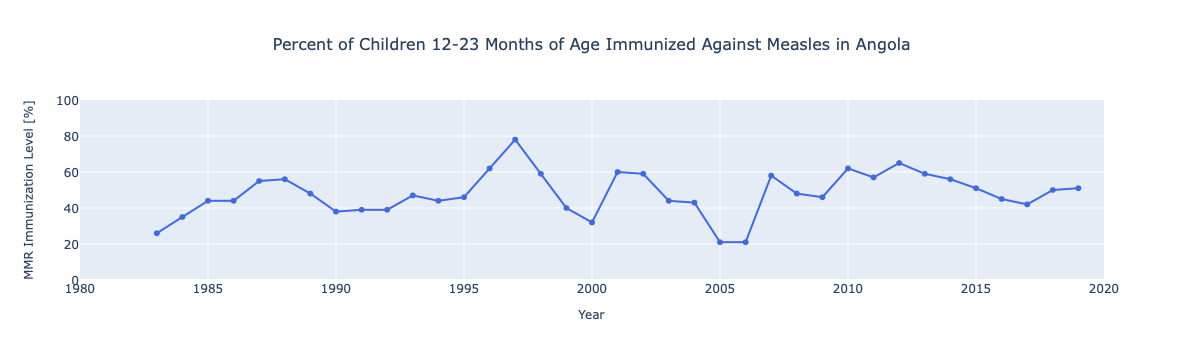

In [105]:
rate_years_fig = go.Figure(data=go.Scatter(x=df_subset.index.astype('int'),
                                           y=df_subset.values,
                                           line={"color": "royalblue", "width": 2},
                                           mode="lines+markers"
                                          )
                          )
rate_years_fig.update_xaxes(range=[1980,2020])
rate_years_fig.update_yaxes(range=[0,100])

# Update the layout
rate_years_fig.update_layout(
    xaxis={"title": {"text": "Year", "font": {"size": 12}}},
    yaxis={"title": {"text": "MMR Immunization Level [%]", "font": {"size": 12}}},
    title={'text': "Percent of Children 12-23 Months of Age Immunized Against Measles in "+ user_country, "font": {"size": 16}, "x":0.5}
)

rate_years_fig.show()
